In [1]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# example from: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

In [2]:
c

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
...,...,...
189,Paraguay,SOUTH AMERICA
190,Peru,SOUTH AMERICA
191,Suriname,SOUTH AMERICA
192,Uruguay,SOUTH AMERICA


In [3]:
c.groupby('Region').size()

Region
AFRICA           54
ASIA             44
EUROPE           47
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
dtype: int64

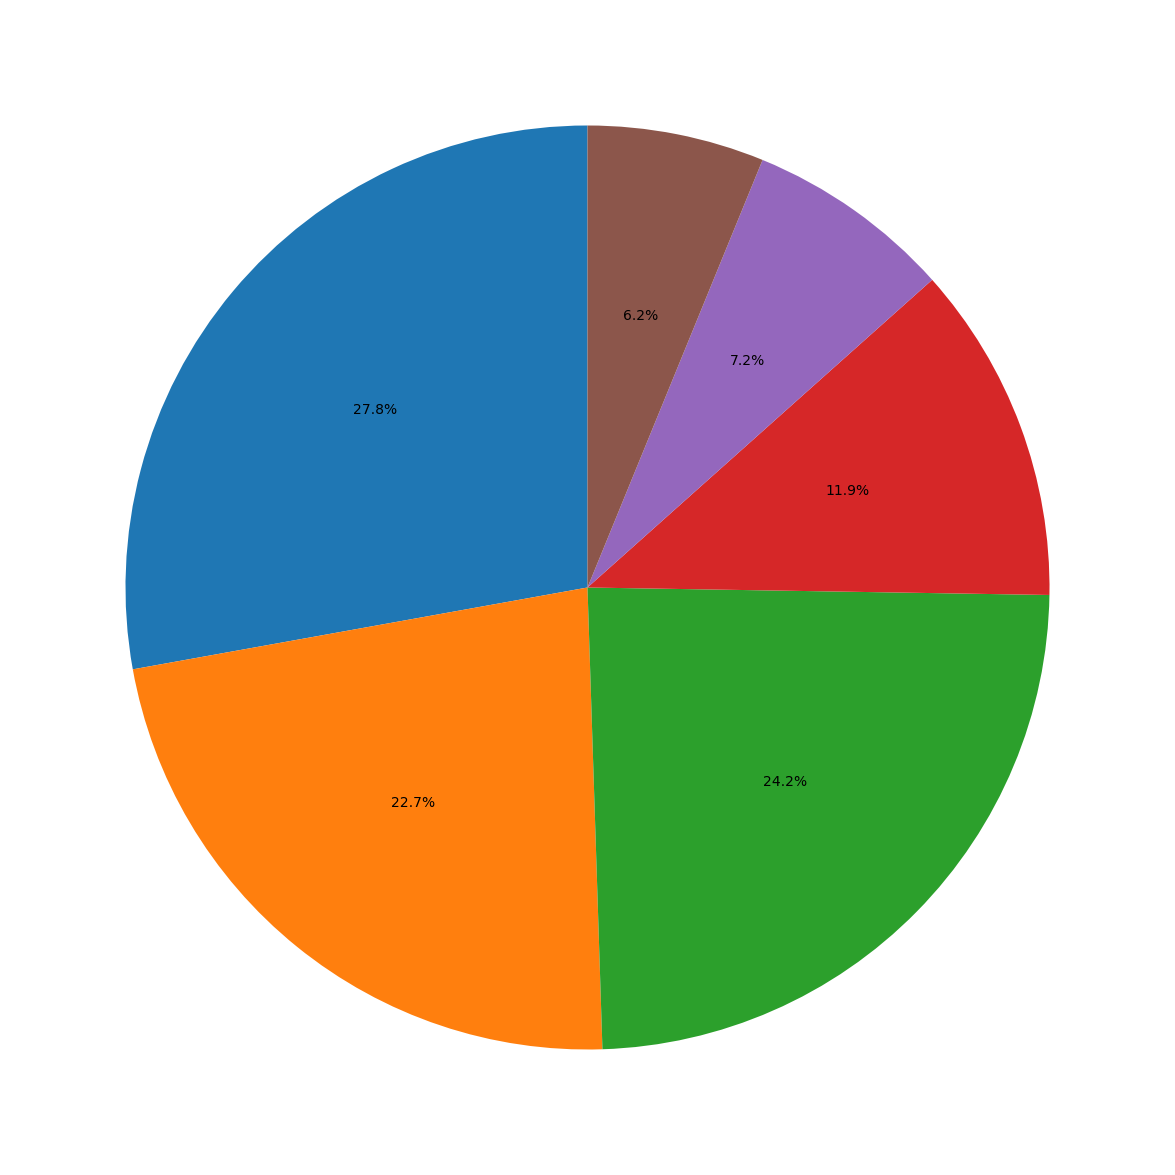

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = [30, 15]
plt.pie(c.groupby('Region').size(), startangle=90, autopct='%.1f%%')
plt.show()

# more fun stats and visualizations

from: https://beepb00p.xyz/hpi.html

but installing calmap was not easy, but somehow a new learning experience: 
https://stackoverflow.com/questions/29286624/how-to-install-pypi-packages-using-anaconda-conda-command


    conda skeleton pypi calmap 
    conda build calmap
    conda install --use-local calmap


In [5]:
#from https://beepb00p.xyz/hpi.html
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2.3))

import calmap


<Figure size 720x165.6 with 0 Axes>

# weight history

```
Sports & Fitness: 

13.04.2018 weight is 85.7kg
16.04.2019 weight is 85.5 but belly is way bigger than it used to be!
07.02.2020 weight is 83.2 but mostly because I was sick and throwing up

Withings - Your Weekly Report

March 2–8 AVERAGE WEIGHT 83.5 KG
March 9–15 AVERAGE WEIGHT 82.9 KG
March 16–22 AVERAGE WEIGHT 82.2 KG
March 23–29 AVERAGE WEIGHT 81.8 KG
March 30 – April 5 AVERAGE WEIGHT 81.3 KG
April 6–12 AVERAGE WEIGHT 80.6 KG
April 13–19 AVERAGE WEIGHT 79.7 KG
April 20–26 AVERAGE WEIGHT 79.6 KG
April 27 – May 3 AVERAGE WEIGHT 79.7 KG
May 4–10 AVERAGE WEIGHT 80.6 KG
May 11–17 AVERAGE WEIGHT 80.3 KG
May 18–24 AVERAGE WEIGHT 79.1 KG
May 25–31 AVERAGE WEIGHT 78.6 KG

df = pd.DataFrame({'dt': '13.04.2018', 'messages': 1})
```

In [6]:
!free

              total        used        free      shared  buff/cache   available
Mem:        2041036      829252       82684       47404     1129100      995268
Swap:       4194300      120832     4073468


In [7]:
!df

Filesystem     1K-blocks     Used Available Use% Mounted on
udev             1007492        0   1007492   0% /dev
tmpfs             204104      656    203448   1% /run
/dev/vda1       50633164 28411728  22205052  57% /
tmpfs            1020516        8   1020508   1% /dev/shm
tmpfs               5120        0      5120   0% /run/lock
tmpfs            1020516        0   1020516   0% /sys/fs/cgroup
/dev/vda15        106858     3668    103190   4% /boot/efi
tmpfs             204100        0    204100   0% /run/user/1000


In [5]:
!date

Sun Nov 17 15:06:29 CET 2024


In [8]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
days

array(['2015-12-11T00:00:00.000000000', '2014-06-17T00:00:00.000000000',
       '2014-11-04T00:00:00.000000000', '2014-02-07T00:00:00.000000000',
       '2014-05-05T00:00:00.000000000', '2014-05-21T00:00:00.000000000',
       '2014-12-11T00:00:00.000000000', '2014-04-11T00:00:00.000000000',
       '2014-03-27T00:00:00.000000000', '2015-06-13T00:00:00.000000000',
       '2015-08-14T00:00:00.000000000', '2015-02-03T00:00:00.000000000',
       '2014-10-10T00:00:00.000000000', '2015-04-11T00:00:00.000000000',
       '2015-09-18T00:00:00.000000000', '2014-07-05T00:00:00.000000000',
       '2014-07-04T00:00:00.000000000', '2014-09-25T00:00:00.000000000',
       '2015-10-29T00:00:00.000000000', '2014-07-31T00:00:00.000000000',
       '2014-02-26T00:00:00.000000000', '2014-09-23T00:00:00.000000000',
       '2014-12-27T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2014-08-03T00:00:00.000000000', '2015-06-22T00:00:00.000000000',
       '2015-04-14T00:00:00.000000000', '2015-10-04

<Axes: >

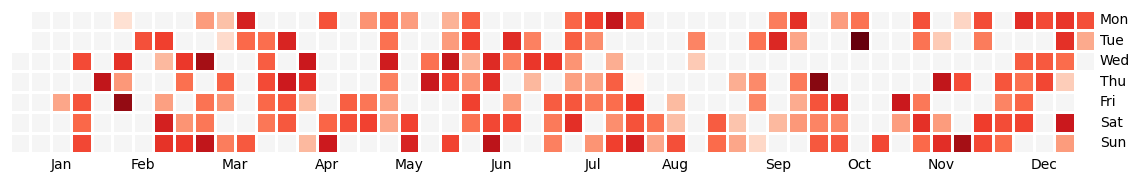

In [9]:
plt.figure(figsize=(14, 4))
calmap.yearplot(data=events) #, year=2015)
# https://pythonhosted.org/calmap/  and   https://beepb00p.xyz/hpi.html

In [10]:
import git
# https://www.feststelltaste.de/reading-a-git-repos-commit-history-with-pandas-efficiently/
# https://gitpython.readthedocs.io/en/stable/tutorial.html#using-git-directly

In [12]:
repo = git.Repo('/home/mike/Documents/code/learning')
git_bin = repo.git
print (git_bin)
git_log = git_bin.execute('git log --numstat --pretty=format:"\t\t\t%h\t%at\t%aN"', shell=True)
print (len(git_log))

85702


In [13]:
from io import StringIO

commits_raw = pd.read_csv(StringIO(git_log), 
    sep="\t",
    header=None,              
    names=['additions', 'deletions', 'filename', 'sha', 'timestamp', 'author']
    )
commits_raw.head()

,additions,deletions,filename,sha,timestamp,author
0,NaN,NaN,NaN,2981444,1.500632e+09,mike.bochenek@gmail.com
1,4,2,app/speech/TwilioController.scala,NaN,NaN,NaN
2,NaN,NaN,NaN,db7f1e3,1.500632e+09,mike.bochenek@gmail.com
3,1,1,app/common/EmailReport.scala,NaN,NaN,NaN
4,NaN,NaN,NaN,1717a4e,1.500018e+09,mike.bochenek@gmail.com


In [14]:
commits_raw.groupby(['author']).size()


author
Mike Bochenek               51
mike.bochenek@gmail.com    710
mikebochenek                 2
dtype: int64

In [15]:
ts = pd.to_datetime(commits_raw['timestamp'], unit='s').dropna()
# https://datascience.stackexchange.com/questions/14645/convert-a-pandas-column-of-int-to-timestamp-datatype

In [16]:
type(ts)
#ts.values

pandas.core.series.Series

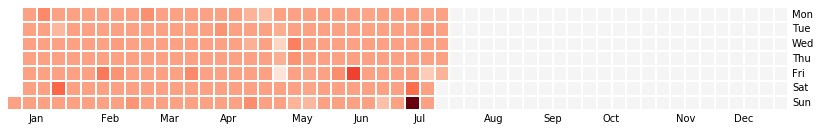

In [18]:
plt.figure(figsize=(14, 12))
events = pd.Series(np.random.randn(len(ts.values)), index=ts.values)
calmap.yearplot(data=events, year=2017)
